In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [2]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [3]:
def greeting_node(state: AgentState) -> str:
    """Greets the user and initializes the counter."""
    state["name"] = f"Hi there, {state['name']}!"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> str:
    """Generates a random number and appends it to the list."""
    rand_num = random.randint(1, 10 )
    state["number"].append(rand_num)
    state["counter"] += 1

    return state


def should_continue(state: AgentState) -> str:
    """Function to decide the next action."""

    if state["counter"] < 5:
        print("Continuing to add numbers...")
        return "loop"
    else:
        print("Reached 5 numbers, ending loop.")
        return "exit"



In [8]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting_node)
graph.add_node("random", random_node)

graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "random")
graph.add_conditional_edges("random", should_continue, 
                           {
        "loop": "random",
        "exit": END
    }
)

app = graph.compile()

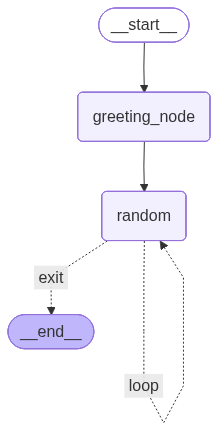

In [9]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
app.invoke(AgentState(name="Alice", number=[], counter=0))

Continuing to add numbers...
Continuing to add numbers...
Continuing to add numbers...
Continuing to add numbers...
Reached 5 numbers, ending loop.


{'name': 'Hi there, Alice!', 'number': [8, 5, 7, 7, 3], 'counter': 5}